<a href="https://colab.research.google.com/github/Mayurc1997/Nairobi-transport-demand-Predication/blob/main/Nairobi_Public_Transport_Demand_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b><u> Project Title : Traffic Jam Predicting People's Movement into Nairobi 


</u></b>



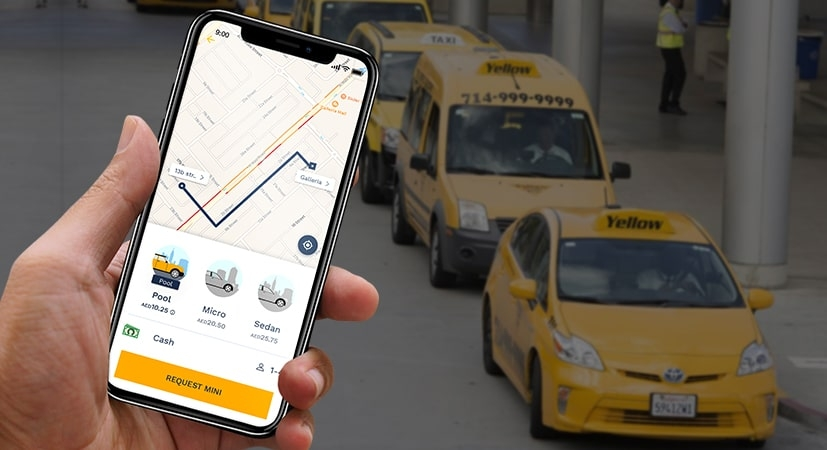

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark


### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

##**Objective**
****
##The main objective is to build a predictive model, which could help in predicting the number of tickets can book in a ride.

## <b> Data Description </b>

### <b>Nairobi Public Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

Importing libraries

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [ ]:
#Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing csv file using pandas .read_csv() function

df = pd.read_csv('/content/drive/MyDrive/Nairobi Transport Data.zip')  

##**Feature Engineering**
***
All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises. Feature engineering mainly have two goals:

* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

We'll try adding and removing some features in this section in order to make a perfect data matrix we can pass to a machine learning model. We will try to interpret categorical features as numeric to be passed to the ML models.

In [ ]:
#Checking first 5 rows of the Dataframe using .head() function

df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
#Checking first rows of the Dataframe using .tail() function
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [ ]:
#Checking the number of rows and columns in dataframe
df.shape

(51645, 10)

In [ ]:
#Checking information of dataframe using .info() function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
#Checking Null values present in dataframe

df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

From above all features, there is no null values present in the dataset so we don't need to work on the null value treatment. Amongest 10 columns we can see that ride_id and max_capacity are the two int type(numerical) while remaining all are of object type(categotical,timestamp)

In [ ]:
#Using .describe() function checking count,mean,std,min etc in dataframe

df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


Most of the columns in our dataframe are categorical so we have to do encoding for that.

In [ ]:
#check unique values for categorical columnns
categorical_columns = df.select_dtypes(include=['object'])
for col in categorical_columns:
  print(f'Unique values in categorical columns {col} are: {categorical_columns[col].unique()[:8]}\n')

Unique values in categorical columns seat_number are: ['15A' '14A' '8B' '19A' '11A' '18B' '25' '21B']

Unique values in categorical columns payment_method are: ['Mpesa' 'Cash']

Unique values in categorical columns payment_receipt are: ['UZUEHCBUSO' 'TIHLBUSGTE' 'EQX8Q5G19O' 'SGP18CL0ME' 'BM97HFRGL9'
 'B6PBDU30IZ' 'MZHGDGS6QZ' 'MYVTYFNXDZ']

Unique values in categorical columns travel_date are: ['17-10-17' '19-11-17' '26-11-17' '27-11-17' '20-04-18' '19-04-18'
 '18-04-18' '17-04-18']

Unique values in categorical columns travel_time are: ['7:15' '7:12' '7:05' '7:10' '7:09' '5:10' '9:50' '7:06']

Unique values in categorical columns travel_from are: ['Migori' 'Keroka' 'Homa Bay' 'Kisii' 'Keumbu' 'Rongo' 'Kijauri' 'Oyugis']

Unique values in categorical columns travel_to are: ['Nairobi']

Unique values in categorical columns car_type are: ['Bus' 'shuttle']



In [ ]:

#check unique values for numerical columns
numerical_columns = df._get_numeric_data()
for col in numerical_columns:
  print(f'Unique values in numerical columns {col} are: {numerical_columns[col].unique()[:8]}\n')

Unique values in numerical columns ride_id are: [1442 5437 5710 5777 5778 5781 5784 5789]

Unique values in numerical columns max_capacity are: [49 11]



In [ ]:
# Differentiating the numerical and categorical features
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print("Following are the categorical features in this dataset:")
print(categorical_features)
print("Following are the numeric features in this dataset:")
print(numeric_features)

Following are the categorical features in this dataset:
['payment_method', 'travel_to', 'car_type', 'max_capacity']
Following are the numeric features in this dataset:
['ride_id', 'seat_number', 'payment_receipt', 'travel_date', 'travel_time', 'travel_from']


Categorical Features are mostly binary type in our case, hence the values majorly are either 0 and 1 (some exceptions excluded). As for the numeric features, all have a different set of range and continuity of values.

Now, lets see the distribution graphs for all features.

In [ ]:
categorical_features = ['payment_method', 'travel_from', 'travel_to', 'car_type','max_capacity']

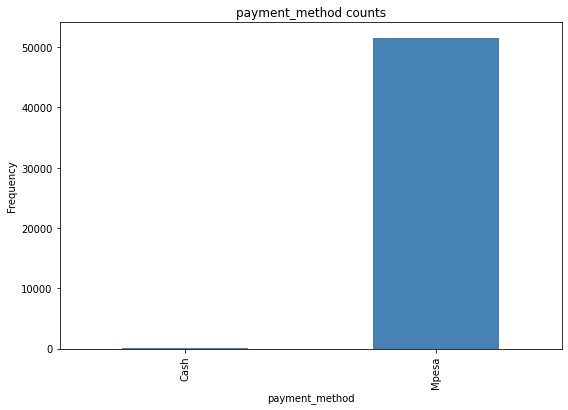

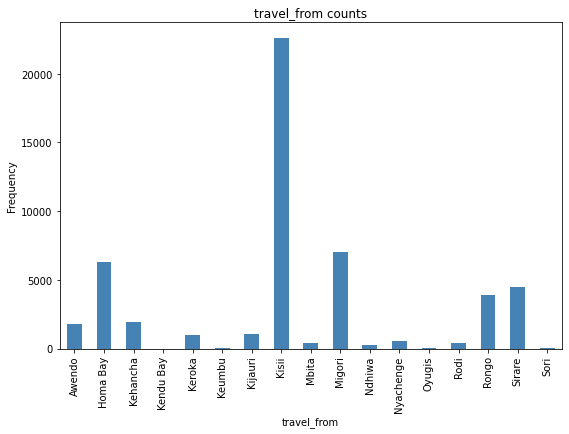

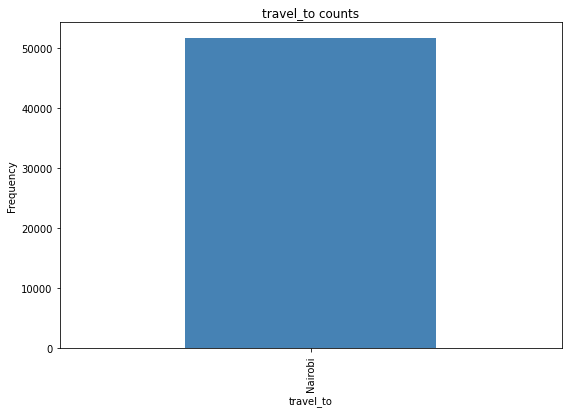

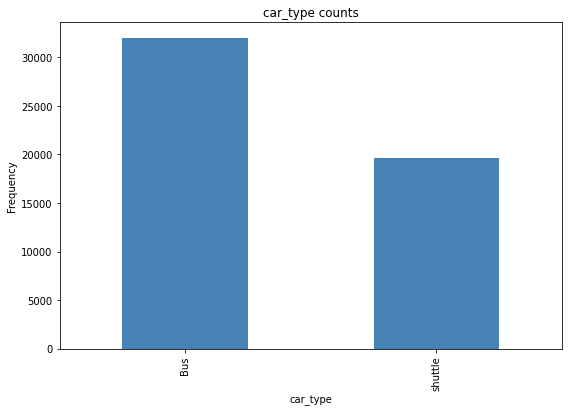

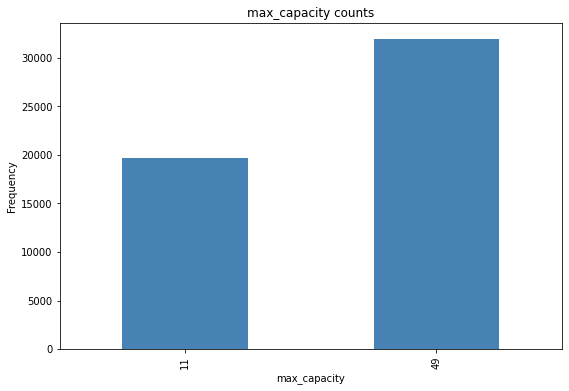

In [ ]:
# plot a bar plot for each categorical feature count  

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


Most of the payments were done by using Mpesa payment method.
most number of ride are from kissi toward the Nairobi and there is a only one destination point is Nairobi.
Between two car_types Bus and shuttle people preferred bus most.
Bus has maximum capacity of 49 seats while shuttle has 11 seats.

**Finding Target variable.**

Since we are not given the target variable so we need to find target variable.

For finding Target variable, I am find the count of ride_id and that will be the number_of_tickets as our target variable.

In [ ]:
#Creating target variable "Tickets"
labels = df.groupby(['ride_id']).seat_number.count().rename('Tickets').reset_index()
labels

,ride_id,Tickets
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


In [ ]:
df=df.drop_duplicates("ride_id")

Creating column for target variable as 'Tickets' which can shows the actual number of tickets were booked in each ride.

In [ ]:
#Merging target variable with the dataframe
df = df.merge(labels, how="left",on="ride_id")
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


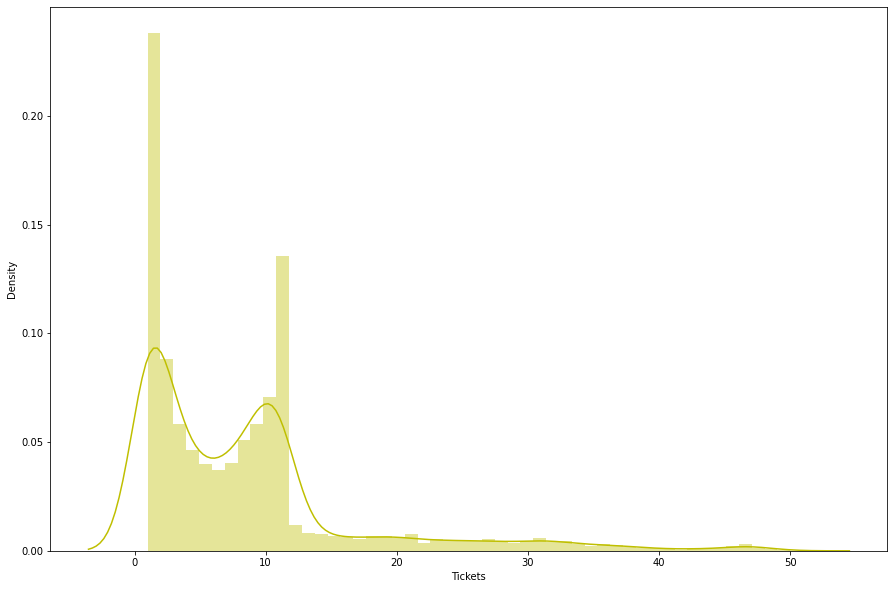

In [ ]:
# Dependent variable 'Tickets'
plt.figure(figsize=(15,10))
sns.distplot(df['Tickets'],color="y")

As ride_id column column doesn't give any idea about dependant variable so dropping that feature.

In [ ]:
#Dropping the ride id column
df.drop(["ride_id"], axis=1, inplace=True)

In [ ]:
#casting travel_date to datetime
df["travel_date"] = pd.to_datetime(df["travel_date"],infer_datetime_format=True)

#creating a new column travel day & month
df["travel_day"] = df["travel_date"].dt.dayofyear
df["month"]=df["travel_date"].dt.month

Here we have two types of car_type data values 'Bus' and 'shuttle'. So we transforming those data to binary formats.
0 for 'Bus', 1 for 'Shuttle'

In [ ]:
#encoding the car type category data
df["car_type"] = pd.Categorical(df["car_type"])
car_type_categories = df.car_type.cat.categories
df["car_type"] = df.car_type.cat.codes

From the dataset we have total 17 place from were the rides were get started and reached to the final destination Nairobi. So we are numbering 0 to 16 each ride starting point that we can use this as another feature for predicting the model.

In [ ]:
#encoding the travel from category data
df["travel_from"] = pd.Categorical(df["travel_from"])
travel_from_categories = df.travel_from.cat.categories
df["travel_from"] = df.travel_from.cat.codes

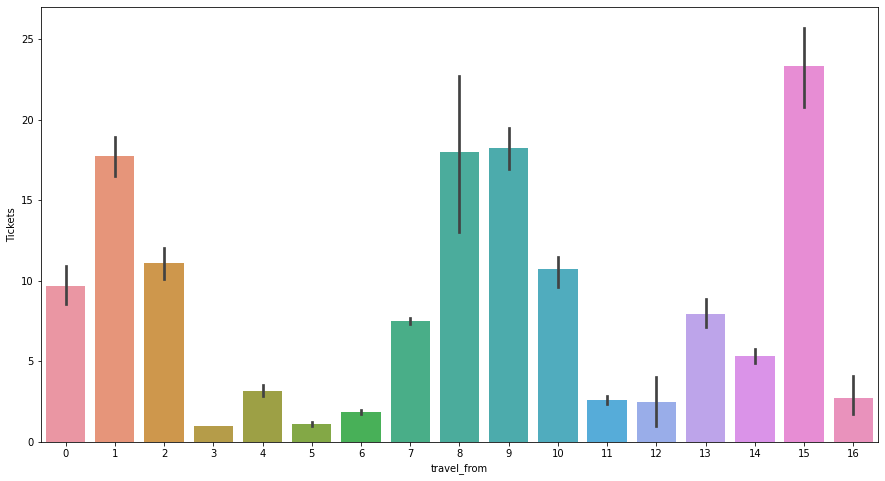

In [ ]:
plt.figure(figsize=(15,8))
sp=sns.barplot(x='travel_from',y='Tickets',data=df)

The time format is expressed at the base of 60 (min or sec) but for ease of case we converting those entries to the base 100 (percent) which actually shows us the total travelled time in terms of hours
For example,
7.25hrs = 7 + 0.25hrs = 7 + 0.25/100*60 = 7 hrs and 15 mins

In [ ]:
#express travel time in hours
df["travel_time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) + (int(x[1])/60))

In [ ]:
df.head()

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Tickets,travel_day,month
0,15A,Mpesa,UZUEHCBUSO,2017-10-17,7.250000,9,Nairobi,0,49,1,290,10
1,14A,Mpesa,TIHLBUSGTE,2017-11-19,7.200000,9,Nairobi,0,49,1,323,11
2,8B,Mpesa,EQX8Q5G19O,2017-11-26,7.083333,4,Nairobi,0,49,1,330,11
3,19A,Mpesa,SGP18CL0ME,2017-11-27,7.166667,1,Nairobi,0,49,5,331,11
4,11A,Mpesa,BM97HFRGL9,2017-11-27,7.200000,9,Nairobi,0,49,31,331,11


In [ ]:
#num_of_tickets per hour
ticks = df.groupby("travel_time")["Tickets"].count()
df["travel_time"].map(ticks)

0       167
1       159
2       251
3       118
4       159
       ... 
6244     41
6245    251
6246    291
6247    152
6248     77
Name: travel_time, Length: 6249, dtype: int64

In [ ]:
df["Tickets"] = (df["travel_time"].map(ticks))

In [ ]:
#Setting travel date column as index
df = df.set_index('travel_date')

In [ ]:
df.groupby(['travel_from', 'travel_time', 'travel_day'], sort=False)

Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

So travel period hugely affect the Transport demand let divide that period slots into sub-time plots as 'em' or Early morning,'am' or Ante Meridiem(first period) ,mid,'eve' or evening,'pm' or  Post Meridiem(post-midday period)

In [ ]:
df['period'] = np.nan
df.loc[df.travel_time < 7, 'period'] = 'em'
df.loc[(df.travel_time >= 7) & (df.travel_time < 11), 'period'] = 'am'
df.loc[(df.travel_time >= 11) & (df.travel_time < 15), 'period'] = 'mid'
df.loc[(df.travel_time >= 15) & (df.travel_time < 19), 'period'] = 'eve'
df.loc[(df.travel_time >= 19) & (df.travel_time <= 24), 'period'] = 'pm'

In [ ]:
df["period"] = pd.Categorical(df["period"])
period_categories = df.period.cat.categories
df["period"] = df.period.cat.codes

In [ ]:
tcount = dict(df["period"].value_counts())

In [ ]:
pcount = dict(df['period'].value_counts())
df['hourly_travelers'] = np.log1p(df['period'].map(pcount))
df.head()

,seat_number,payment_method,payment_receipt,travel_time,travel_from,travel_to,car_type,max_capacity,Tickets,travel_day,month,period,hourly_travelers
travel_date,,,,,,,,,,,,,
2017-10-17,15A,Mpesa,UZUEHCBUSO,7.250000,9,Nairobi,0,49,167,290,10,0,8.494743
2017-11-19,14A,Mpesa,TIHLBUSGTE,7.200000,9,Nairobi,0,49,159,323,11,0,8.494743
2017-11-26,8B,Mpesa,EQX8Q5G19O,7.083333,4,Nairobi,0,49,251,330,11,0,8.494743
2017-11-27,19A,Mpesa,SGP18CL0ME,7.166667,1,Nairobi,0,49,118,331,11,0,8.494743
2017-11-27,11A,Mpesa,BM97HFRGL9,7.200000,9,Nairobi,0,49,159,331,11,0,8.494743


In [ ]:
tcount = dict(df["travel_day"].value_counts())
df["daily_travelers"] = (df["travel_day"].map(tcount))

In [ ]:
#removing the unnecessary columns
notrequired = ["seat_number","payment_method","payment_receipt","travel_to"]
for i in notrequired:
  df.drop(i , inplace = True , axis = 1)

In [ ]:
df.head()

,travel_time,travel_from,car_type,max_capacity,Tickets,travel_day,month,period,hourly_travelers,daily_travelers
travel_date,,,,,,,,,,
2017-10-17,7.250000,9,0,49,167,290,10,0,8.494743,1
2017-11-19,7.200000,9,0,49,159,323,11,0,8.494743,1
2017-11-26,7.083333,4,0,49,251,330,11,0,8.494743,1
2017-11-27,7.166667,1,0,49,118,331,11,0,8.494743,47
2017-11-27,7.200000,9,0,49,159,331,11,0,8.494743,47


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


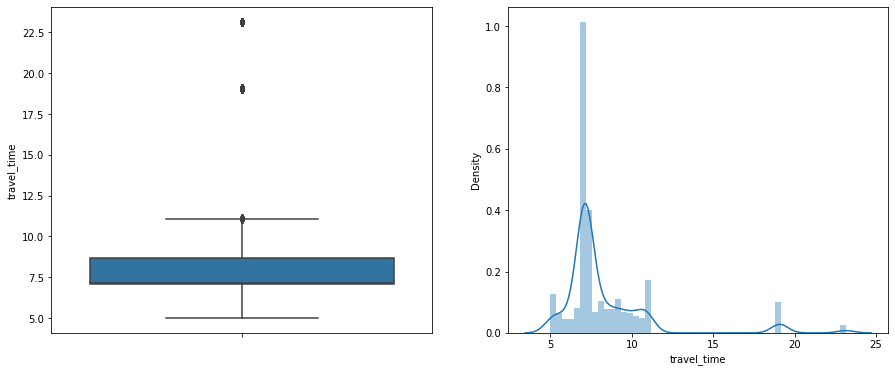

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


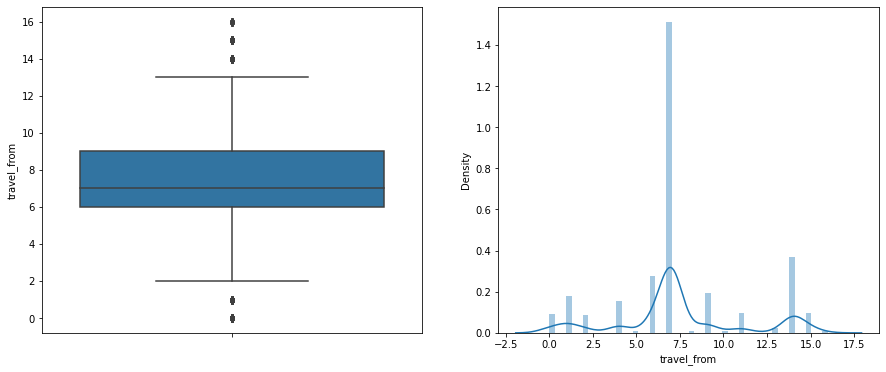

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


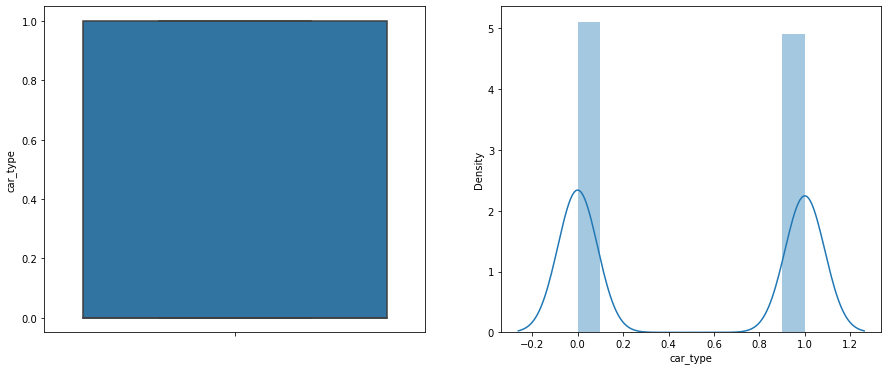

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


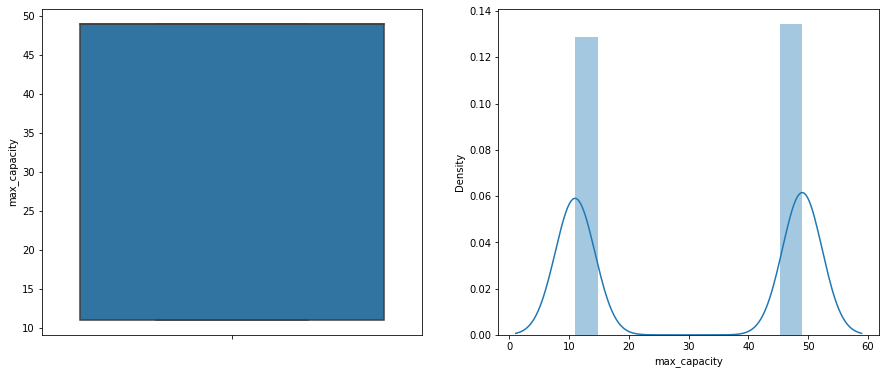

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


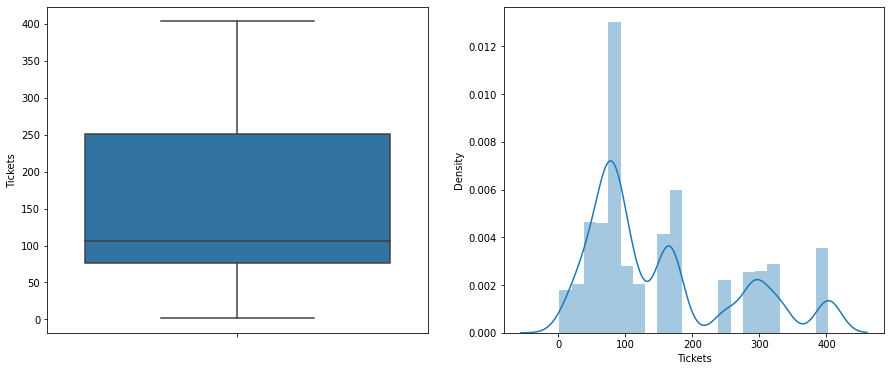

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


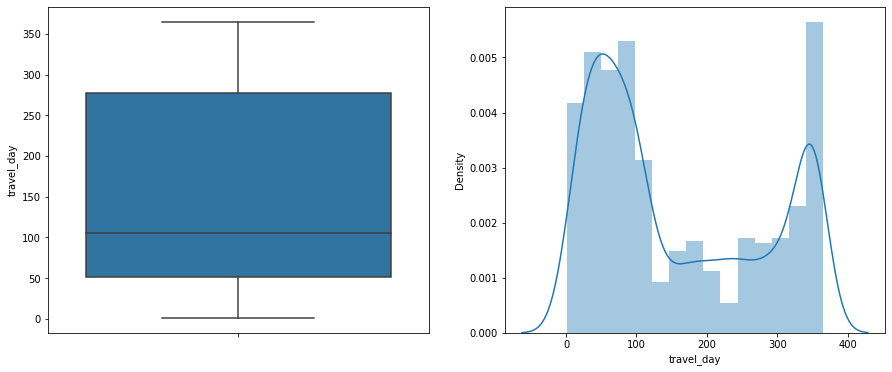

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


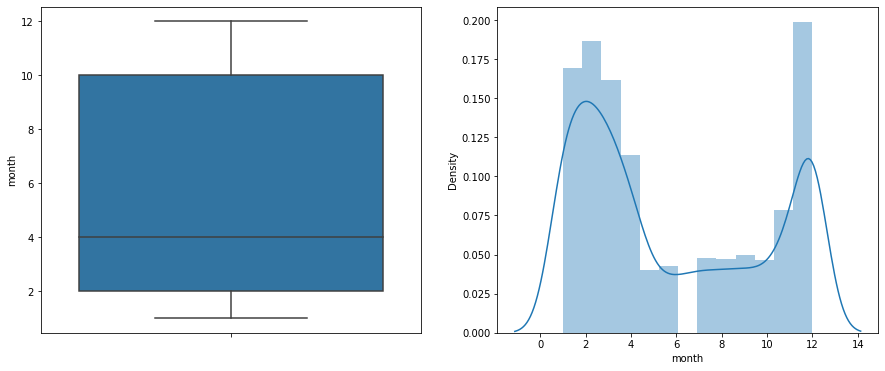

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


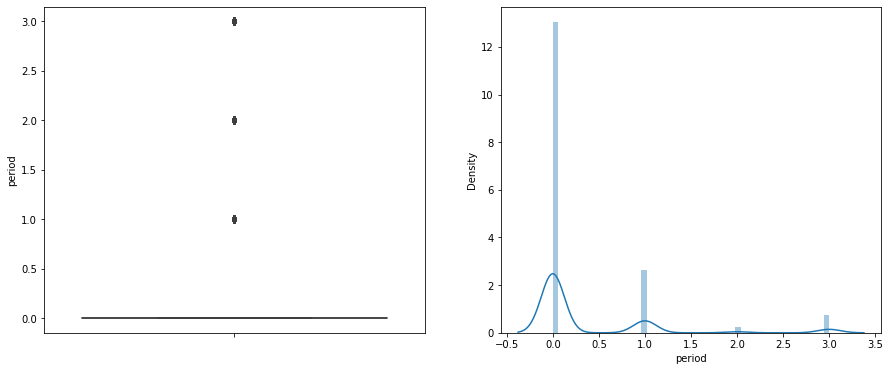

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


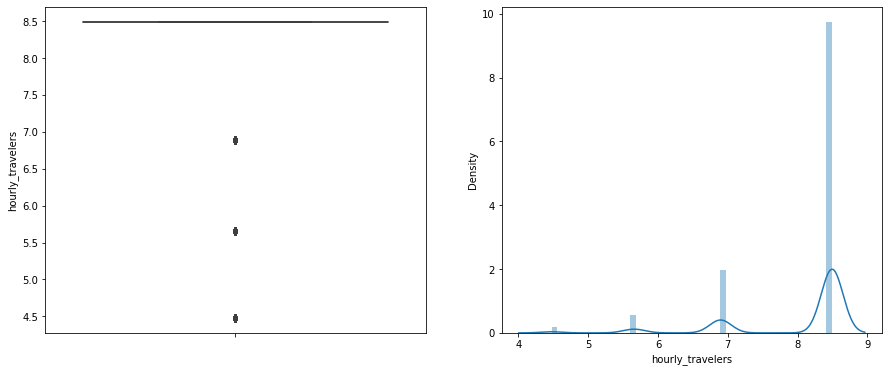

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


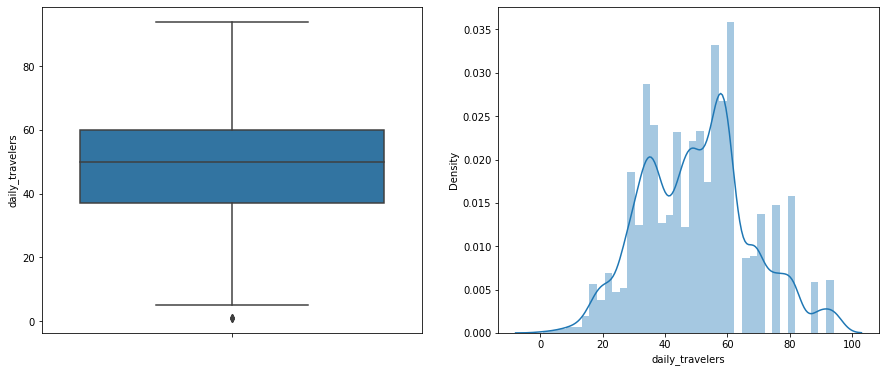

In [ ]:
for var in df.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_xlabel(var)

    plt.show()

In [ ]:
#creating dependent and independent dataframe
df_independent, df_dependent = df.drop(["Tickets"], axis = 1),df["Tickets"]

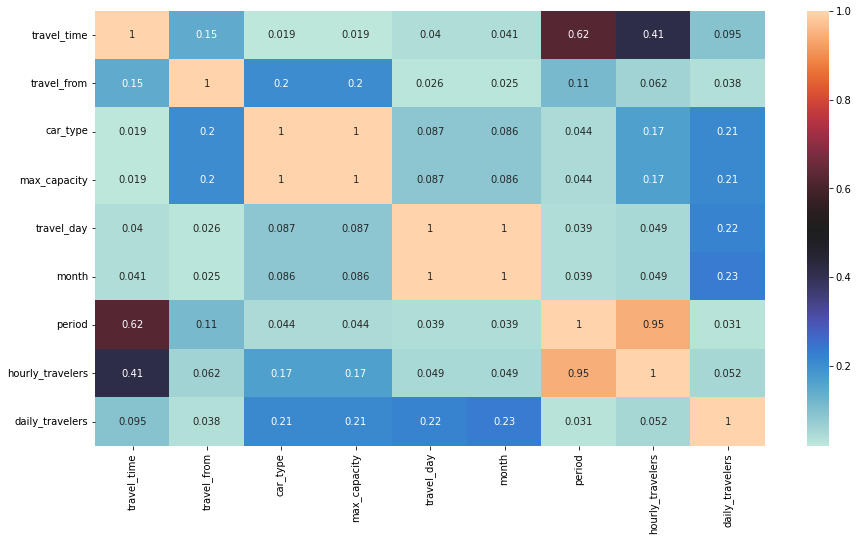

In [ ]:
#finding the correlation for multilinearity in independent variable
plt.figure(figsize=(15,8))
correlation = df_independent.corr()
sns.heatmap(abs(correlation), annot=True, cmap='icefire')

In [ ]:
#Dropping the collinear columns
Collinearcolumns = ["month","max_capacity", "period"]
for a in Collinearcolumns:
  df_independent.drop(a,inplace = True , axis = 1)

In [ ]:
df_independent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6249 entries, 2017-10-17 to 2017-11-14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   travel_time       6249 non-null   float64
 1   travel_from       6249 non-null   int8   
 2   car_type          6249 non-null   int8   
 3   travel_day        6249 non-null   int64  
 4   hourly_travelers  6249 non-null   float64
 5   daily_travelers   6249 non-null   int64  
dtypes: float64(2), int64(2), int8(2)
memory usage: 256.3 KB


In [ ]:
# independent variables
X = df[list(df.columns)[1:]]

# dependent variable
y = df["Tickets"]


Plotting the correlation plot of all independant variable versus the target variable 'Tickets' and getting some kind of predictive insights from it.

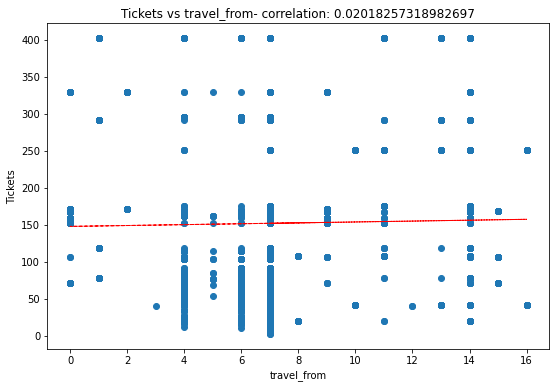

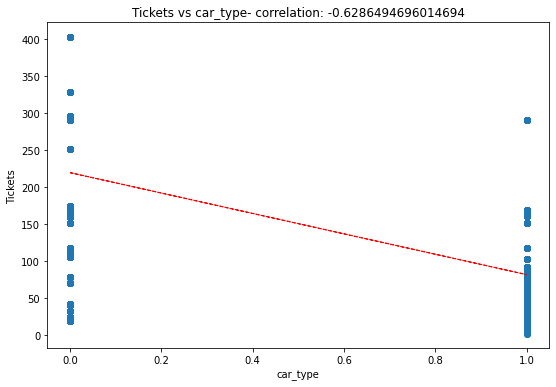

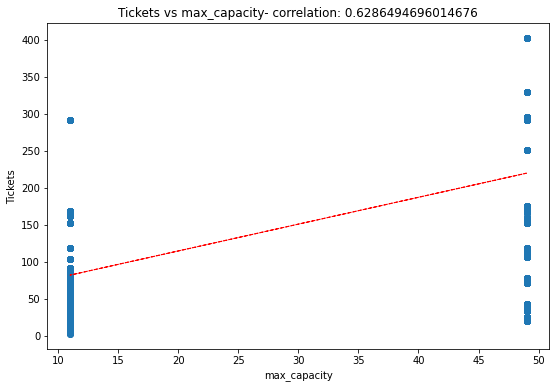

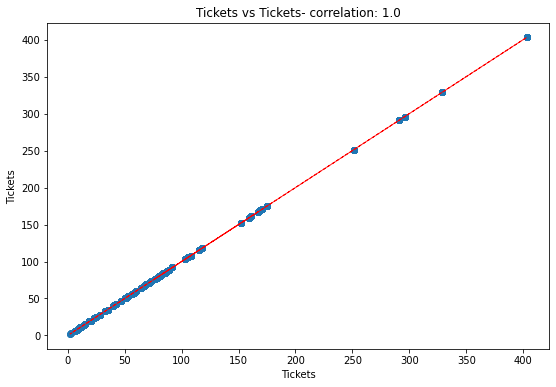

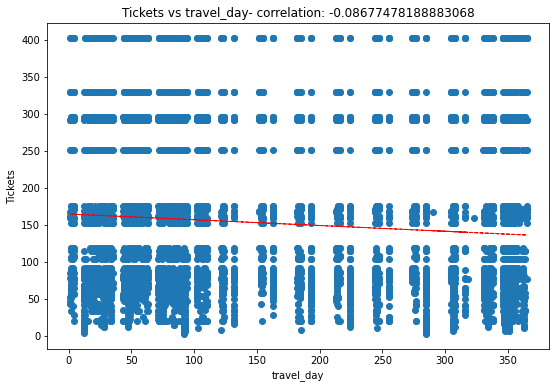

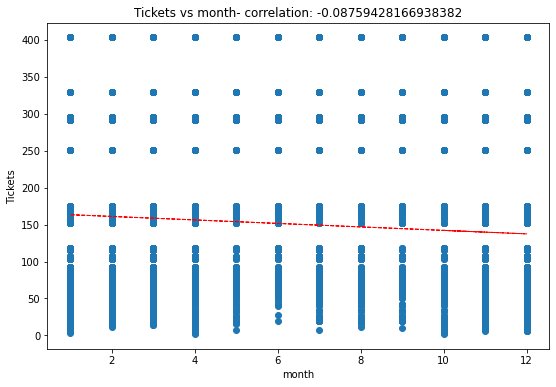

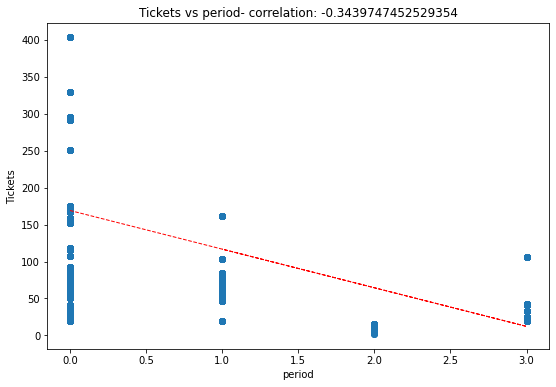

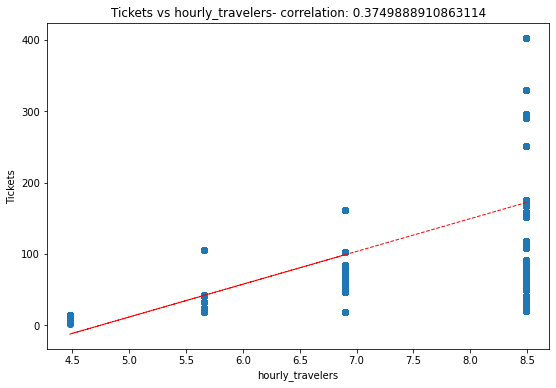

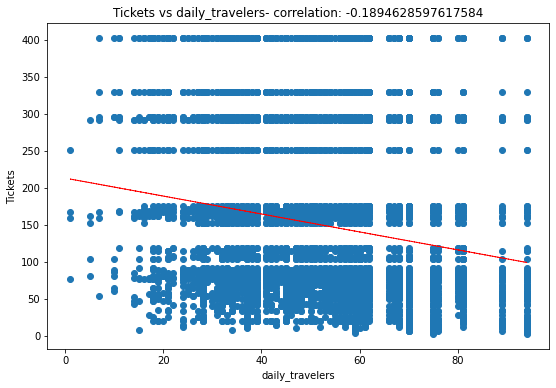

In [ ]:
for col in X:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Tickets']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Tickets')
    ax.set_title('Tickets vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Tickets'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Looking towards the correlation in independant variables and target variable tickets more number of feature doesnt shoes the linear relationship.This has strongly insights that Linear regression model will perform the low accuracy.But still lets go towards the all model implementation.

In [ ]:
# display independent variables dataframe
X

,travel_from,car_type,max_capacity,Tickets,travel_day,month,period,hourly_travelers,daily_travelers
travel_date,,,,,,,,,
2017-10-17,9,0,49,167,290,10,0,8.494743,1
2017-11-19,9,0,49,159,323,11,0,8.494743,1
2017-11-26,4,0,49,251,330,11,0,8.494743,1
2017-11-27,1,0,49,118,331,11,0,8.494743,47
2017-11-27,9,0,49,159,331,11,0,8.494743,47
...,...,...,...,...,...,...,...,...,...
2018-04-20,10,0,49,41,110,4,3,5.659482,41
2018-04-20,10,0,49,251,110,4,0,8.494743,41
2018-04-20,14,0,49,291,110,4,0,8.494743,41


In [ ]:
# display dependent variable dataframe
y

travel_date
2017-10-17    167
2017-11-19    159
2017-11-26    251
2017-11-27    118
2017-11-27    159
             ... 
2018-04-20     41
2018-04-20    251
2018-04-20    291
2018-04-20    152
2017-11-14     77
Name: Tickets, Length: 6249, dtype: int64

From the above dataframe the data looks much cleaned.The target variable y showing the number of tickets had booked on that particular day.

Now its time built various regression model.Lets import all necessary libraries that we are using to predict regression model. 

##**Importing Neccessary Libraries**

In [ ]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Datatime library for Date columns.
from datetime import datetime
import datetime as dt
from operator import itemgetter

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor.
from xgboost import XGBRegressor

# Import metrics libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing graphviz for visualizing decision trees.
import graphviz
import sklearn.tree as tree

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


##**Splitting the Dataframe into train and test sets.**
***

Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets.

Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parameters.

In [ ]:
#Splitting dataset into Train & Test

X = df_independent.values
y = df_dependent.values
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4999, 6)
(1250, 6)


##**Models**
***
Now its time to implement the Machine Learning models and check the accuracy of each model to point out the best one out of all. In this project we are implementing 7 machine learning algorithms to predict the target variable and then we'll apply optimization techniques on the one that gives best resulting accuracy out of all.

Following algorithms have been used for predictions:-

* Linear Regression 
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree
* Random Forest Regression
* XGB Regression

### **1.Linear Regression**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. There are two main types:

**Simple regression**:

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

**y=mx+b**

**Multivariable regression**:

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

**f(x,y,z)=w1x+w2y+w3z**

In [ ]:
# building the model and fitting training data
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# checking the score
reg.score(X_train, y_train)

0.5451907016972521

In [ ]:
# check the coefficeints
reg.coef_


array([-1.02386366e+01, -1.81019939e+00, -1.35364597e+02, -4.69220147e-03,
        1.91408522e+01, -2.00548065e-01])

In [ ]:
# predict for train data
y_pred_train=reg.predict(X_train)

# predict for test data
y_pred_test=reg.predict(X_test)

In [ ]:
# calculating MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)


# calculating r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr )

MSE : 5472.644944817263
RMSE : 73.97732723488504
MAE : 54.478697108289055
R2 : 0.5451907016972521
Adjusted R2 : 0.5429953229443829


In [ ]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),4),
       'MSE':round((MSE_lr),4),
       'RMSE':round((RMSE_lr),4),
       'R2_score':round((r2_lr),4),
       'Adjusted R2':round((Adjusted_R2_lr ),4)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# calculating MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


# calculating r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 5687.7031172401175
RMSE : 75.41686228715776
MAE : 55.49961068182147
R2 : 0.5259658370229987
Adjusted R2 : 0.5236776592451531


In [ ]:
# storing the test set metrics value in test evaluation dataframe.
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),4),
       'MSE':round((MSE_lr),4),
       'RMSE':round((RMSE_lr),4),
       'R2_score':round((r2_lr),4),
       'Adjusted R2':round((Adjusted_R2_lr ),4)
       }
test_df=pd.DataFrame(dict2,index=[1])

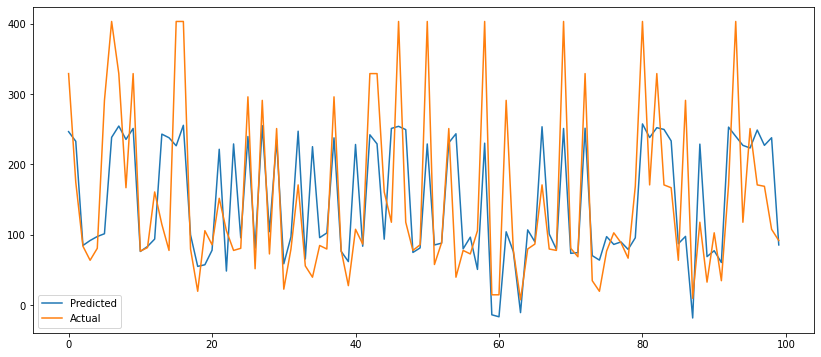

In [ ]:
#Plot the actual vs predicted graph.
plt.figure(figsize=(14,6))
plt.plot((y_pred_test)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()


### **2.Lasso Regression**

Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

**Limitation of Lasso Regression**:
Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Creating an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Model Score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.5267451038419373 0.5447589496898639


In [ ]:
# Predict for training data
y_pred_train_lasso=lasso.predict(X_train)

# Predict for testing data
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# calculating MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

# calculating RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


# calculating MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


# calculating r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )


MSE : 5477.8401452000735
RMSE : 74.01243236916399
MAE : 54.8632803429492
R2 : 0.5447589496898639
Adjusted R2 : 0.5425614868565085


In [ ]:
# storing the train set metrics value in the train evaluation dataframe
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),4),
       'MSE':round((MSE_l),4),
       'RMSE':round((RMSE_l),4),
       'R2_score':round((r2_l),4),
       'Adjusted R2':round((Adjusted_R2_l ),4)
       }
training_df = training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

# calculating RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


# calculating MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


# calculating r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )

MSE : 5678.353077387708
RMSE : 75.3548477364775
MAE : 55.80371560525284
R2 : 0.5267451038419373
Adjusted R2 : 0.5244606876094768


In [ ]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),4),
       'MSE':round((MSE_l),4),
       'RMSE':round((RMSE_l),4),
       'R2_score':round((r2_l),4),
       'Adjusted R2':round((Adjusted_R2_l ),4),
       }
test_df=test_df.append(dict2,ignore_index=True)

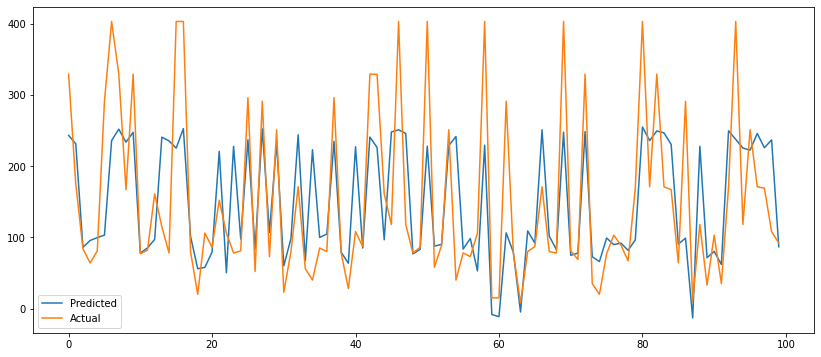

In [ ]:
#Plot the actual vs predicted graph.
plt.figure(figsize=(14,6))
plt.plot(np.array(y_pred_test_lasso)[:100])
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

### **3.Ridge Regression**

In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient  lambda  to control that penalty term. In this case if  lambda  is zero then the equation is the basic OLS else if  lambda  >  0 then it will add a constraint to the coefficient. As we increase the value of lambda this constraint causes the value of the coefficient to tend towards zero. This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.

**Limitation of Ridge Regression**: Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Creating the model object
ridge= Ridge(alpha=0.1)

In [ ]:
# Fitting the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# checking the score
ridge.score(X_train, y_train)

0.5451906989983649

In [ ]:
# predict for train data
y_pred_train_ridge=ridge.predict(X_train)

# predict for test data
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# calculating MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

# calculating RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


# calculating MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


# calculating r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_r)

MSE : 5472.644977292526
RMSE : 73.97732745437973
MAE : 54.47973976057349
R2 : 0.5451906989983649
Adjusted R2 : 0.542995320232468


In [ ]:
# storing the train set metrics value in the train evaluation dataframe 
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),4),
       'MSE':round((MSE_r),4),
       'RMSE':round((RMSE_r),4),
       'R2_score':round((r2_r),4),
       'Adjusted R2':round((Adjusted_R2_r ),4)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

# calculating RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


# calculating MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


# calculating r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_r)

MSE : 5687.680049518835
RMSE : 75.41670935223065
MAE : 55.50061374936814
R2 : 0.5259677595720005
Adjusted R2 : 0.5236795910743592


In [ ]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),4),
       'MSE':round((MSE_r),4),
       'RMSE':round((RMSE_r),4),
       'R2_score':round((r2_r),4),
       'Adjusted R2':round((Adjusted_R2_r ),4)}
test_df=test_df.append(dict2,ignore_index=True)

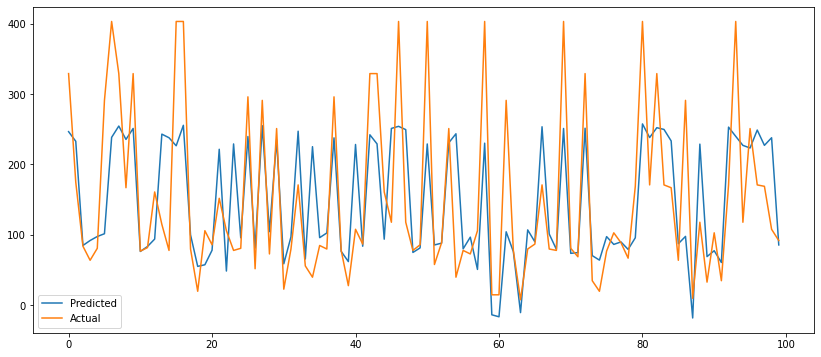

In [ ]:
#Plotting the figure
plt.figure(figsize=(14,6))
plt.plot((y_pred_test_ridge)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

### **4.Elastic Net Regression**

Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# creating a model object.
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# check the score
elasticnet.score(X_train, y_train)

0.5337958701701317

In [ ]:
# predict on train data
y_pred_train_en=elasticnet.predict(X_train)

# predict on test data
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
# calculating MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 5609.757064966639
RMSE : 74.89831149609876
MAE : 57.996848294932725
R2 : 0.5337958701701317
Adjusted R2 : 0.5315454882079602


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),4),
       'MSE':round((MSE_e),4),
       'RMSE':round((RMSE_e),4),
       'R2_score':round((r2_e),4),
       'Adjusted R2':round((Adjusted_R2_e ),4)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 5774.49618625291
RMSE : 75.99010584446445
MAE : 58.84960955613712
R2 : 0.5187321824222557
Adjusted R2 : 0.5164090875666913


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),4),
       'MSE':round((MSE_e),4),
       'RMSE':round((RMSE_e),4),
       'R2_score':round((r2_e),4),
       'Adjusted R2':round((Adjusted_R2_e ),4)}
test_df=test_df.append(dict2,ignore_index=True)

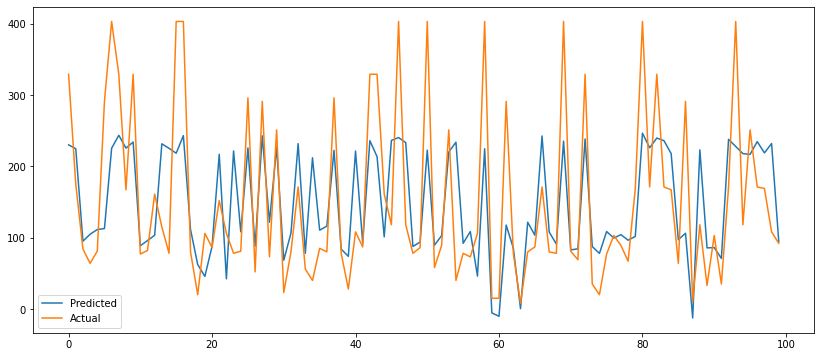

In [ ]:
# Plot the figure
plt.figure(figsize=(14,6))
plt.plot(np.array(y_pred_test_en)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# display test evaluation dataframe
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,55.4996,5687.7031,75.4169,0.5260,0.5237
1,Lasso regression,55.8037,5678.3531,75.3548,0.5267,0.5245
2,Ridge regression,55.5006,5687.6800,75.4167,0.5260,0.5237
3,Elastic net regression Test,58.8496,5774.4962,75.9901,0.5187,0.5164


###**5.Decision Tree**

Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In a Decision Tree diagram, we have:

**Root Node**: The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.

**Splitting**: It is a process of dividing a node into two or more sub-nodes.

**Decision Node**: This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.

**Leaf**: Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# independent variables
X = df[list(df.columns)[1:]]

# dependent variable
y = df["Tickets"]

In [ ]:
print(X.columns)
print(len(X.columns))

Index(['travel_from', 'car_type', 'max_capacity', 'Tickets', 'travel_day',
       'month', 'period', 'hourly_travelers', 'daily_travelers'],
      dtype='object')
9


In [ ]:
# building the model
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=5, max_leaf_nodes=100)
# fitting training data to the model
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=5,
                      max_leaf_nodes=100)

In [ ]:
# predict for train data
y_pred_train_d = decision_regressor.predict(X_train)

# predict for test data
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
# calculating model score
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# calculating r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


Model Score: 0.990569430091257
MSE : 113.47648548617268
RMSE : 10.652534228350204
MAE : 4.0413227515048895
R2 : 0.990569430091257
Adjusted R2 : 0.9905239084344167


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),4),
       'MSE':round((MSE_d),4),
       'RMSE':round((RMSE_d),4),
       'R2_score':round((r2_d),4),
       'Adjusted R2':round((Adjusted_R2_d),4)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:

# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


# calculating r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


MSE : 112.79121054565204
RMSE : 10.620320642318292
MAE : 3.8480126188004213
R2 : 0.9905995643619115
Adjusted R2 : 0.9905541881641412


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),4),
       'MSE':round((MSE_d),4),
       'RMSE':round((RMSE_d),4),
       'R2_score':round((r2_d),4),
       'Adjusted R2':round((Adjusted_R2_d),4)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

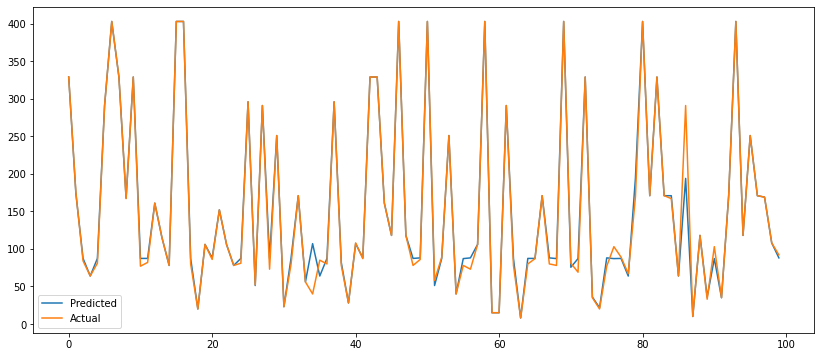

In [ ]:
#Plot the actual vs predicted graph.
plt.figure(figsize=(14,6))
plt.plot(np.array(y_pred_test_d)[:100])
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# display train evaluation dataframe.
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,54.4787,5472.6449,73.9773,0.5452,0.5430
1,Lasso regression,54.8633,5477.8401,74.0124,0.5448,0.5426
2,Ridge regression,54.4797,5472.6450,73.9773,0.5452,0.5430
3,Elastic net regression,57.9968,5609.7571,74.8983,0.5338,0.5315
4,Decision tree regression,4.0413,113.4765,10.6525,0.9906,0.9905


In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,55.4996,5687.7031,75.4169,0.5260,0.5237
1,Lasso regression,55.8037,5678.3531,75.3548,0.5267,0.5245
2,Ridge regression,55.5006,5687.6800,75.4167,0.5260,0.5237
3,Elastic net regression Test,58.8496,5774.4962,75.9901,0.5187,0.5164
4,Decision tree regression,3.8480,112.7912,10.6203,0.9906,0.9906


### **6.Random Forest**

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [ ]:
# Create an instance of the RandomForestRegressor.
rf_model = RandomForestRegressor(n_estimators = 10, max_depth = 10)

# fitting the train data in model.
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [ ]:
# predict for train data.
y_pred_train_r = rf_model.predict(X_train)

# predict for test data.
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
# calculating model score.
print("Model Score:",rf_model.score(X_train,y_train))

# calculating MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


# calculating r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


Model Score: 0.9998741093603273
MSE : 1.5148212127059675
RMSE : 1.2307807329926674
MAE : 0.205261708027297
R2 : 0.9998741093603273
Adjusted R2 : 0.9998735016822596


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),4),
       'MSE':round((MSE_rf),4),
       'RMSE':round((RMSE_rf),4),
       'R2_score':round((r2_rf),4),
       'Adjusted R2':round((Adjusted_R2_rf ),4)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)

# Calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


MSE : 7.508684253190594
RMSE : 2.740197849278514
MAE : 0.3217815449470213
R2 : 0.9993741985505131
Adjusted R2 : 0.9993711777872815


In [ ]:
# storing the test set metrics value in the test evaluation dataframe.
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),4),
       'MSE':round((MSE_rf),4),
       'RMSE':round((RMSE_rf),4),
       'R2_score':round((r2_rf),4),
       'Adjusted R2':round((Adjusted_R2_rf ),4)}
test_df=test_df.append(dict2,ignore_index=True)

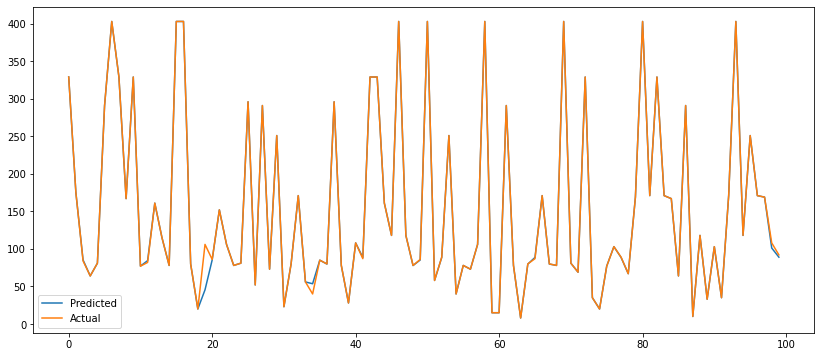

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(np.array(y_pred_test_r)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# feature importances for random forest model
print(rf_model.feature_importances_)

[5.76639264e-01 6.11821112e-03 3.92060531e-01 9.44779437e-04
 2.41086632e-02 1.28551115e-04]


In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,55.4996,5687.7031,75.4169,0.5260,0.5237
1,Lasso regression,55.8037,5678.3531,75.3548,0.5267,0.5245
2,Ridge regression,55.5006,5687.6800,75.4167,0.5260,0.5237
3,Elastic net regression Test,58.8496,5774.4962,75.9901,0.5187,0.5164
4,Decision tree regression,3.8480,112.7912,10.6203,0.9906,0.9906
5,Random forest regression,0.3218,7.5087,2.7402,0.9994,0.9994


###**7.XGB Regressor**

XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [ ]:
# making a model object of XGB regressor.
model = XGBRegressor(n_estimators=11, max_depth=8)

# fitting train data in XGB model. 
model.fit(X_train, y_train)

[16:30:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, n_estimators=11)

In [ ]:
# predict on train data.
y_pred_train_xgb = model.predict(X_train)

# predict on test data.
y_pred_test_xgb = model.predict(X_test)

In [ ]:
# calculating model score on train data.
print("Model Score:", model.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :", MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :", RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :", MAE_d)

# calculating r2
r2_d= r2_score(y_train, y_pred_train_xgb)
print("R2 :", r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )


Model Score: 0.7083261856952972
MSE : 3509.6626901582345
RMSE : 59.24240618136838
MAE : 48.058556132064766
R2 : 0.7083261856952972
Adjusted R2 : 0.7069182670421771


In [ ]:
# storing the train matrics in the train evaluation dataframe
dict1={'Model':'XGBoost Regression ',
       'MAE':round((MAE_d),4),
       'MSE':round((MSE_d),4),
       'RMSE':round((RMSE_d),4),
       'R2_score':round((r2_d),4),
       'Adjusted R2':round((Adjusted_R2_d),4)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_d)

# calculating r2
r2_d= r2_score((y_test), (y_pred_test_xgb))
print("R2 :",r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )

MSE : 3471.1706820821405
RMSE : 58.916641809272704
MAE : 47.71904601049423
R2 : 0.7106998282235328
Adjusted R2 : 0.7093033672173713


In [ ]:
# storing the test matrics in the test evaluation dataframe
dict2={'Model':'XGBoost regression ',
       'MAE':round((MAE_d),4),
       'MSE':round((MSE_d),4),
       'RMSE':round((RMSE_d),4),
       'R2_score':round((r2_d),4),
       'Adjusted R2':round((Adjusted_R2_d),4)
      }
test_df=test_df.append(dict2,ignore_index=True)

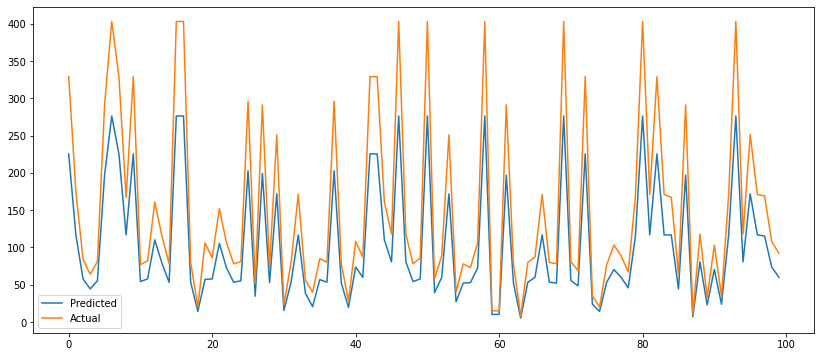

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(np.array(y_pred_test_xgb)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,55.4996,5687.7031,75.4169,0.5260,0.5237
1,Lasso regression,55.8037,5678.3531,75.3548,0.5267,0.5245
2,Ridge regression,55.5006,5687.6800,75.4167,0.5260,0.5237
3,Elastic net regression Test,58.8496,5774.4962,75.9901,0.5187,0.5164
4,Decision tree regression,3.8480,112.7912,10.6203,0.9906,0.9906
5,Random forest regression,0.3218,7.5087,2.7402,0.9994,0.9994
6,XGBoost regression,47.7190,3471.1707,58.9166,0.7107,0.7093


##**Optimization**
***

From the Scores we have seen earlier Random forest has given by far the accuracy in predicting the target variable. Hence we have selected that for the optimization section. 

Here we'll try to improve the accuracy of the random forest model in predicting the number of Tickets books each ride. 

Now lets talk about Optimization technique we are using. But before diving into that we need to understand what hyperparameters are.

**Hyperparameters** are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, **max_depth** in Random Forest Algorithms.

Now we know what hyperparameters are, our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. To achieve that we'll use Grid Search CV that will help us find best hyperparameters values for our Random forest model.

**Grid Search** uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.


### **Random Forest with Grid Search CV**

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

In [ ]:
# Defining a parameter dictionary for grid search CV. This will be the set of parameters 
# and their values the grid search algorithm will apply and get the 
# best combination of these parameters for optimised and accurate results.

param_grid_cv = {
'n_estimators': [200, 500],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [5,6,7,8,9,10,11],

}
param_grid_cv

{'n_estimators': [200, 500],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [5, 6, 7, 8, 9, 10, 11]}

In [ ]:
# Running the GridSearchCV algorithm on above parameter dictionary 
# with estimator as rf_model(random forest model) to get the 
# best combination of parameters for random forest algorithm.
CV_rfc = GridSearchCV(estimator = rf_model, param_grid = param_grid_cv, cv = 3)

# Fitting the training data into the model.
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=10, n_estimators=10),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
# predict on train data.
y_pred_train_grid_cvr = CV_rfc.predict(X_train)

# predict on test data.
y_pred_test_grid_cvr = CV_rfc.predict(X_test)

In [ ]:
# calculating model score on train data
print("Model Score:",CV_rfc.score(X_train,y_train))

# calculating MSE
MSE_rf = mean_squared_error(y_train, y_pred_train_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score(y_train, y_pred_train_grid_cvr)
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_grid_cvr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


Model Score: 0.9999311075635644
MSE : 0.828971275218896
RMSE : 0.9104785967934096
MAE : 0.10865108931050664
R2 : 0.9999311075635644
Adjusted R2 : 0.9999307750176122


In [ ]:
# Storing metrics in a dictionary.
dict1={'Model':'Random forest regression with gridSearchCV ',
       'MAE':round((MAE_rf),4),
       'MSE':round((MSE_rf),4),
       'RMSE':round((RMSE_rf),4),
       'R2_score':round((r2_rf),4),
       'Adjusted R2':round((Adjusted_R2_rf ),4)}

# adding the values to the train evaluation dataframe.
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_grid_cvr))
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_grid_cvr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf)

MSE : 6.670134985640439
RMSE : 2.5826604472211283
MAE : 0.23396282746237193
R2 : 0.9994440863403581
Adjusted R2 : 0.9994414029276808


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Random forest regression with gridSearchCV',
       'MAE':round((MAE_rf),4),
       'MSE':round((MSE_rf),4),
       'RMSE':round((RMSE_rf),4),
       'R2_score':round((r2_rf),4),
       'Adjusted R2':round((Adjusted_R2_rf ),4)}
test_df=test_df.append(dict2,ignore_index=True)

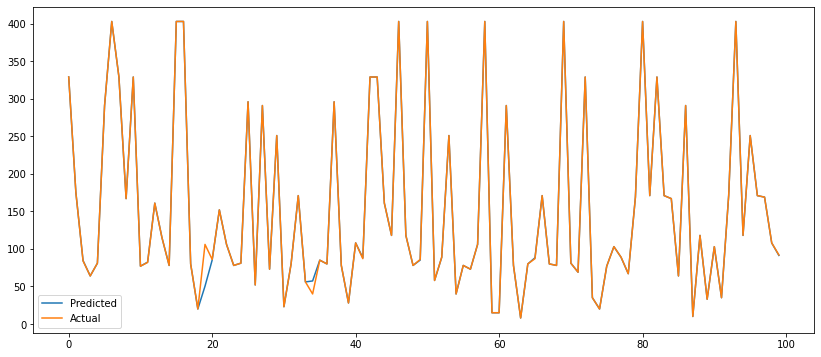

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(np.array(y_pred_test_grid_cvr)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# feature importances for grid CV random forest model.
rf_model.feature_importances_

array([5.76639264e-01, 6.11821112e-03, 3.92060531e-01, 9.44779437e-04,
       2.41086632e-02, 1.28551115e-04])

###**XGB Regressor with GridSearchCV**

In [ ]:
import xgboost as xgb

In [ ]:
xgb = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.999807172792392
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
xgb_grid.fit(X_test,
         y_test)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.9984176356722602
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
# predict on train data.
y_pred_train_grid_xgb = xgb_grid.predict(X_train)

# predict on test data.
y_pred_test_grid_xgb = xgb_grid.predict(X_test)

In [ ]:
# calculating model score on train data
print("Model Score:",xgb_grid.score(X_train,y_train))

# calculating MSE
MSE_xgb = mean_squared_error(y_train, y_pred_train_grid_xgb)
print("MSE :",MSE_xgb)

# calculating RMSE
RMSE_xgb=np.sqrt(MSE_xgb)
print("RMSE :",RMSE_xgb)


# calculating MAE
MAE_xgb= mean_absolute_error(y_train, y_pred_train_grid_xgb)
print("MAE :",MAE_xgb)


# calculating r2
r2_xgb= r2_score(y_train, y_pred_train_grid_xgb)
print("R2 :",r2_xgb)

# calculating adjusted r2
Adjusted_R2_xgb = (1-(1-r2_score(y_train, y_pred_train_grid_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_xgb )


Model Score: 0.9985567130371469
MSE : 17.366832935594225
RMSE : 4.1673532290404935
MAE : 2.397776293644883
R2 : 0.9985567130371469
Adjusted R2 : 0.998549746245693


In [ ]:
# Storing metrics in a dictionary.
dict1={'Model':'XGB regression with gridSearchCV ',
       'MAE':round((MAE_xgb),4),
       'MSE':round((MSE_xgb),4),
       'RMSE':round((RMSE_xgb),4),
       'R2_score':round((r2_xgb),4),
       'Adjusted R2':round((Adjusted_R2_xgb),4)}

# adding the values to the train evaluation dataframe.
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating model score on test data
print("Model Score:",xgb_grid.score(X_test,y_test))

# calculating MSE
MSE_xgb = mean_squared_error(y_test, y_pred_test_grid_xgb)
print("MSE :",MSE_xgb)

# calculating RMSE
RMSE_xgb=np.sqrt(MSE_xgb)
print("RMSE :",RMSE_xgb)


# calculating MAE
MAE_xgb= mean_absolute_error(y_test, y_pred_test_grid_xgb)
print("MAE :",MAE_xgb)


# calculating r2
r2_xgb= r2_score(y_test, y_pred_test_grid_xgb)
print("R2 :",r2_xgb)

# calculating adjusted r2
Adjusted_R2_xgb = (1-(1-r2_score(y_test, y_pred_test_grid_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_xgb )


Model Score: 0.9999283293502483
MSE : 0.8599409279851806
RMSE : 0.9273299995067456
MAE : 0.6655597282409668
R2 : 0.9999283293502483
Adjusted R2 : 0.9999279833937733


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'XGB regression with gridSearchCV',
       'MAE':round((MAE_rf),4),
       'MSE':round((MSE_rf),4),
       'RMSE':round((RMSE_rf),4),
       'R2_score':round((r2_rf),4),
       'Adjusted R2':round((Adjusted_R2_rf ),4)}
test_df=test_df.append(dict2,ignore_index=True)

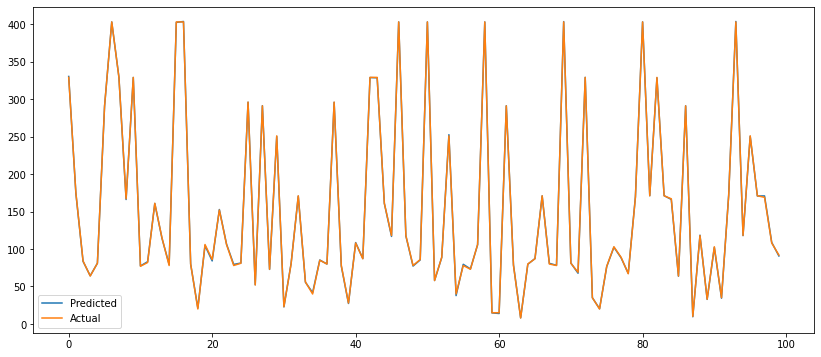

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(np.array(y_pred_test_grid_xgb)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# feature importances for grid CV XGB regressor model.
model.feature_importances_

array([2.7991520e-02, 5.2689044e-03, 9.6609336e-01, 6.4619764e-04,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

## **Conclusion**
***
Now that we are finished implementing all the models, its time to evaluate them and conclude our findings and learnings over them.

Lets start by looking at the training scores for all the models. 


In [ ]:
# Training Scores.
training_df 

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,54.4787,5472.6449,73.9773,0.5452,0.5430
1,Lasso regression,54.8633,5477.8401,74.0124,0.5448,0.5426
2,Ridge regression,54.4797,5472.6450,73.9773,0.5452,0.5430
3,Elastic net regression,57.9968,5609.7571,74.8983,0.5338,0.5315
4,Decision tree regression,4.0413,113.4765,10.6525,0.9906,0.9905
5,Random forest regression,0.2053,1.5148,1.2308,0.9999,0.9999
6,XGBoost Regression,48.0586,3509.6627,59.2424,0.7083,0.7069
7,Random forest regression with gridSearchCV,0.1087,0.8290,0.9105,0.9999,0.9999
8,XGB regression with gridSearchCV,2.3978,17.3668,4.1674,0.9986,0.9985


Also below are the testing scores for all the models.

In [ ]:
# Testing Scores.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,55.4996,5687.7031,75.4169,0.5260,0.5237
1,Lasso regression,55.8037,5678.3531,75.3548,0.5267,0.5245
2,Ridge regression,55.5006,5687.6800,75.4167,0.5260,0.5237
3,Elastic net regression Test,58.8496,5774.4962,75.9901,0.5187,0.5164
4,Decision tree regression,3.8480,112.7912,10.6203,0.9906,0.9906
5,Random forest regression,0.3218,7.5087,2.7402,0.9994,0.9994
6,XGBoost regression,47.7190,3471.1707,58.9166,0.7107,0.7093
7,Random forest regression with gridSearchCV,0.2340,6.6701,2.5827,0.9994,0.9994
8,XGB regression with gridSearchCV,0.2340,6.6701,2.5827,0.9994,0.9994


# **Epilogue**

Challenges faced:

*   Feature engineering – to get the more required features that will ease the further analysis

* What should be the dependent variables  
 
*   To filter the given data
*   Feature to be selected to get the required output

**Work Done by Team**


Nairobi Public Transport Demand Prediction was done by the group of four members-Abhishek kirar, Ganesh Subramanian, Mayur Chulbhare and Syed Aquib.


As soon as we downloaded the Nairobi public transport demand CSV file from Almabetter Dashboard then we uploaded the file in colab notebook through the drive. All the member in group were parcipated equally throughout the project. We used our experience from previous EDA project. As a team we read the data present in the file and gone through the data of each columns in detail as individual. We have arounf total 51645 rows and 10 columns.

Their is no null values present in the data at begining but the major issue with us is that the data contains lot of categorical values. The problem statement already give us the target variable that we have to find out the number of tickets booked in each ride.After making feature engineering the independant variables

We were able to see that the linear algorithms were not performing optimally even with Gradient Boosting optimization, and the tree-based algorithms performed significantly better. This might be the result of data being less correlated linearly, with the target variable. But tree based algorithms were able to find other indirect relationships over the features and hence giving better results.

Out of the tree-based algorithms, the Random Forest Regressor was providing an optimal solution towards achieving our Objective. We were able to achieve an R2 score of 0.9967 in the train split, and 0.9964 in the test split. We also noticed that even in the case of Decision tree, we were able to achieve an R2 score of 0.97 in the test split. This puts weight to the statement that tree based algorithms are significantly better compared to Linear models in this case.

Once we found the best model to work with, We then implemented Grid Search Cross Validation (on Random Forest Regressor), to further optimize the model, and were able to achieve an R2 score of 0.9985 in the train split, and 0.9984 (at best it gave 0.99) in the test split.

Finally, we conclude Random Forest with GridSearchCV to be the best model to achieve our objective. Also in future we can try implementing some other optimising techniques (say hyperparameter tuning, Bayesian Optimization, etc) to wind up with better results.

**At the end a word of Thankyou to you for going through our project till the very end, we appreciate your time. Happy Learning!**


 

